In [1]:
import pandas as pd  
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt  
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest,f_regression


In [2]:
df = pd.read_csv("E:\Data science\Guvi Assesments\Smart Predictive Modeling for Rental Property Prices\House_Rent_Prediction.csv")

In [3]:
df.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [4]:
df.tail()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20554,23,BHK1,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(20555, 25)

In [6]:
df.dtypes

id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom           float64
facing              object
cup_board          float64
floor              float64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent               float64
dtype: object

In [7]:
df.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [8]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')  # You can choose different strategies based on your analysis
df[['latitude', 'longitude']] = imputer.fit_transform(df[['latitude', 'longitude']])
df['property_age'].fillna(df['property_age'].median(), inplace=True)  # Fill missing property_age with median


In [9]:
imputer

SimpleImputer()

In [10]:
# For numerical features, replace missing values with the mean
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

In [11]:
# Handling outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination based on your analysis
df['outlier'] = iso_forest.fit_predict(df[numerical_features])
df = df[df['outlier'] == 1]  # Keep only non-outliers
df.drop('outlier', axis=1, inplace=True)

In [12]:
numerical_features

Index(['latitude', 'longitude', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'property_size', 'property_age', 'bathroom', 'cup_board', 'floor',
       'total_floor', 'balconies', 'rent'],
      dtype='object')

In [13]:
# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features] = df[categorical_features].apply(lambda col: label_encoder.fit_transform(col.astype(str)))

In [14]:
categorical_features

Index(['id', 'type', 'locality', 'activation_date', 'lease_type', 'furnishing',
       'parking', 'facing', 'amenities', 'water_supply', 'building_type'],
      dtype='object')

In [15]:
# Scaling numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [16]:
scaler


StandardScaler()

In [17]:
df.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

#### Feature Selection

In [18]:
x =  df.drop("rent", axis=1)  # Features
y = df["rent"]   # target``

In [19]:
x

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
1,8510,2,374,18011,-0.553284,0.328288,0,-0.501328,1.384748,-0.413054,...,-0.286087,0.297075,2,-0.007562,0.833931,0.210362,1404,1,0,0.947410
2,17640,3,1638,2312,1.260870,23.478782,3,-0.501328,1.384748,-0.413054,...,0.027185,1.822744,0,-0.004652,-0.400939,0.607337,1497,2,0,1.995658
3,19180,1,226,7716,0.346209,-0.928994,3,-0.501328,-0.722153,-0.413054,...,-0.442724,-1.228594,0,-0.010472,-0.400939,-0.583589,219,1,3,-1.149086
4,17051,3,1030,14534,0.615462,0.124169,3,-0.501328,-0.722153,-0.413054,...,1.436911,1.822744,0,-0.001742,-1.018374,-1.377540,446,1,3,-0.100838
5,9110,1,1511,10217,1.374035,0.739805,3,1.994702,1.384748,2.420993,...,-0.912632,0.297075,0,-0.010472,0.833931,0.607337,3032,2,0,0.947410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,10,9,1840,18633,-0.002321,0.015544,4,1.994702,1.384748,2.420993,...,-0.129451,0.081139,8,-0.000142,0.138730,0.131496,0,3,4,0.055899
20551,12,2,1840,18633,-0.002321,0.015544,4,-0.501328,-0.722153,-0.413054,...,-0.129451,0.081139,8,-0.000142,0.138730,0.131496,0,3,4,0.055899
20552,13,2,1840,18633,-0.002321,0.015544,4,1.994702,1.384748,-0.413054,...,-0.129451,0.081139,8,-0.000142,0.138730,0.131496,0,3,4,0.055899
20553,14,2,1840,18633,-0.002321,0.015544,4,-0.501328,1.384748,-0.413054,...,-0.129451,0.081139,8,-0.000142,0.138730,0.131496,0,3,4,0.055899


In [20]:
y

1        0.492902
2        1.285490
3       -1.356472
4        3.531159
5       -0.035491
           ...   
20550    0.104101
20551    0.104101
20552    0.104101
20553    0.104101
20554    0.104101
Name: rent, Length: 19527, dtype: float64

##### Use SelectKBest with f_regression to selct the top k features 

In [21]:
k_best_features = 10 # Adjust as needed
selector = SelectKBest(f_regression, k=k_best_features)
x_selected = selector.fit_transform(x , y)

In [22]:
k_best_features,selector, x_selected

(10,
 SelectKBest(score_func=<function f_regression at 0x000001A0B00CAB60>),
 array([[-5.01327939e-01,  1.38474755e+00, -4.13053595e-01, ...,
          1.40400000e+03,  0.00000000e+00,  9.47409807e-01],
        [-5.01327939e-01,  1.38474755e+00, -4.13053595e-01, ...,
          1.49700000e+03,  0.00000000e+00,  1.99565795e+00],
        [-5.01327939e-01, -7.22153291e-01, -4.13053595e-01, ...,
          2.19000000e+02,  3.00000000e+00, -1.14908648e+00],
        ...,
        [ 1.99470232e+00,  1.38474755e+00, -4.13053595e-01, ...,
          0.00000000e+00,  4.00000000e+00,  5.58985513e-02],
        [-5.01327939e-01,  1.38474755e+00, -4.13053595e-01, ...,
          0.00000000e+00,  4.00000000e+00,  5.58985513e-02],
        [-5.01327939e-01, -7.22153291e-01, -4.13053595e-01, ...,
          0.00000000e+00,  4.00000000e+00,  5.58985513e-02]]))

##### Features Engineering

In [23]:
important_facilies = ["gym", "park"]

In [24]:
important_facilies

['gym', 'park']

#### Assuming latitude and longitude are in radians

In [25]:
scaler = StandardScaler()
x_selected  = scaler.fit_transform(x[["latitude", "longitude"]])


In [26]:
scaler, x_selected

(StandardScaler(),
 array([[-5.53283674e-01,  3.28288364e-01],
        [ 1.26086987e+00,  2.34787822e+01],
        [ 3.46209109e-01, -9.28993870e-01],
        ...,
        [-2.32098265e-03,  1.55440753e-02],
        [-2.32098265e-03,  1.55440753e-02],
        [-2.32098265e-03,  1.55440753e-02]]))

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn. ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

#### Split dataset into traing and testing

In [28]:
# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df.drop("rent", axis=1), df["rent"], test_size=0.2, random_state=42)


In [29]:
x_train, x_test, y_train, y_test

(          id  type  locality  activation_date  latitude  longitude  \
 1693    3535     2      1298            12477  0.450791  -0.178237   
 20066  11751     2       352             4370  1.337203   0.740230   
 7497    5545     2      1322            18596 -1.035925  -0.705728   
 14259   1900     1       548             5396 -1.423036   0.510544   
 3227   18597     2      1163             3501  1.699284  -0.553702   
 ...      ...   ...       ...              ...       ...        ...   
 11873   9734     3       743             6683  1.407450   0.736242   
 12598  14899     2       896            17559 -0.296301  -0.486048   
 5681     993     1       410             9333 -1.351389  -0.112850   
 907    19314     2       270            12385 -0.946553  -0.286821   
 16638   4701     2      1230             8893  0.139329   0.681495   
 
        lease_type       gym      lift  swimming_pool  ...  property_age  \
 1693            0 -0.501328 -0.722153      -0.413054  ...     -0.2860

In [30]:
models = {
    "======Linear Regression": LinearRegression(),
    "======Random Forest": RandomForestRegressor(),
    "======Gradient Boosting": GradientBoostingRegressor(),
    "======Neural Network": MLPRegressor()
}

In [31]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_absolute_error(y_test, predictions)
    print(f"{model_name} MSE: {mse}")

======Linear Regression MSE: 0.48703334508373675


======Random Forest MSE: 0.33941581303681356
======Gradient Boosting MSE: 0.3568371707387031
======Neural Network MSE: 2.746890360571259


#### Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [33]:
# Define the Random Forest Regressor
rf_regressor = RandomForestRegressor()


In [34]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [35]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [36]:
# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [37]:
# Get the best model
best_rf_model = grid_search.best_estimator_
best_rf_model

RandomForestRegressor(min_samples_leaf=2, n_estimators=150)

In [38]:
# Make predictions on the test set
predictions = best_rf_model.predict(x_test)
predictions

array([ 0.31240781,  1.0038264 ,  0.02656958, ...,  0.93423089,
       -0.76765501,  0.82211417])

In [39]:
# Evaluate the model using Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'Best Random Forest Model MSE on Test Set: {mse}')

Best Random Forest Model MSE on Test Set: 0.22523476198100667


### Interpretability and Explainability:

In [40]:
# Extract feature importances from the best random forest model

feature_importance = best_rf_model.feature_importances_
feature_importance

array([0.02101708, 0.01882778, 0.01778221, 0.0199727 , 0.04772898,
       0.14292793, 0.00357484, 0.00091752, 0.00416771, 0.00249915,
       0.00256825, 0.01390501, 0.00975891, 0.56080105, 0.01610705,
       0.03337959, 0.00605071, 0.00975842, 0.00724135, 0.02091929,
       0.0253637 , 0.00397086, 0.00563516, 0.00512477])

In [41]:
# Get the fetures name

feature_names = x_train.columns
feature_names

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies'],
      dtype='object')

In [42]:
# sort feature importance in descending order

indices = feature_importance.argsort()[::-1]
indices 

array([13,  5,  4, 15, 20,  0, 19,  3,  1,  2, 14, 11, 12, 17, 18, 16, 22,
       23,  8, 21,  6, 10,  9,  7], dtype=int64)

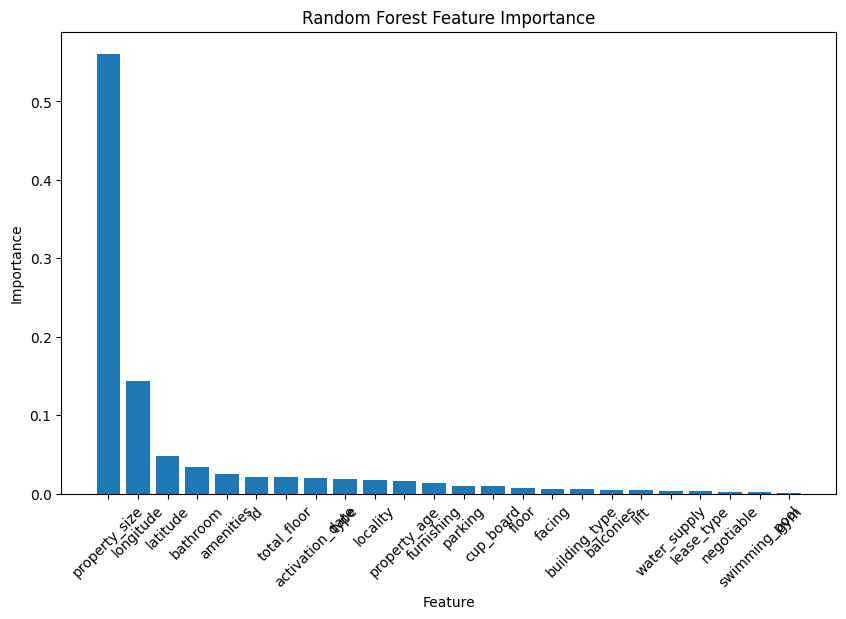

In [43]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()